In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
train_df = pd.read_excel("/content/Data_Train.xlsx")
test_df = pd.read_excel("/content/Test_set.xlsx")

In [ ]:
train_df.shape

(10683, 11)

In [ ]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
final_df = pd.concat([train_df, test_df])
final_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [ ]:
final_df["Date"] = final_df["Date_of_Journey"].str.split("/").str[0]
final_df["Month"] = final_df["Date_of_Journey"].str.split("/").str[1]
final_df["Year"] = final_df["Date_of_Journey"].str.split("/").str[2]
final_df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  object 
 12  Month            13354 non-null  object 
 13  Year             13354 non-null  object 
dtypes: float64(1), object(13)
memory usage: 2.0+ MB


In [ ]:
final_df["Date"] = final_df["Date"].astype(int)
final_df["Month"] = final_df["Month"].astype(int)
final_df["Year"] = final_df["Year"].astype(int)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int64  
 12  Month            13354 non-null  int64  
 13  Year             13354 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 2.0+ MB


In [ ]:
final_df.drop("Date_of_Journey", axis = 1, inplace=True)

In [ ]:
final_df["Arrival_Time"] = final_df["Arrival_Time"].str.split(" ").str[0]
final_df["Arrival_hour"] = final_df["Arrival_Time"].str.split(":").str[0].astype(int)
final_df["Arrival_minute"] = final_df["Arrival_Time"].str.split(":").str[1].astype(int)
final_df.drop("Arrival_Time", axis = 1, inplace=True)


In [ ]:
final_df["Dep_hour"] = final_df["Dep_Time"].str.split(":").str[0].astype(int)
final_df["Dep_minute"] = final_df["Dep_Time"].str.split(":").str[1].astype(int)
final_df.drop("Dep_Time", axis = 1, inplace=True)

In [ ]:
final_df = final_df.dropna(subset=["Route","Total_Stops"])

In [ ]:
final_df.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Route,0
Duration,0
Total_Stops,0
Additional_Info,0
Price,2671
Date,0
Month,0


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13353 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  object 
 1   Source           13353 non-null  object 
 2   Destination      13353 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13353 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13353 non-null  object 
 7   Price            10682 non-null  float64
 8   Date             13353 non-null  int64  
 9   Month            13353 non-null  int64  
 10  Year             13353 non-null  int64  
 11  Arrival_hour     13353 non-null  int64  
 12  Arrival_minute   13353 non-null  int64  
 13  Dep_hour         13353 non-null  int64  
 14  Dep_minute       13353 non-null  int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 1.6+ MB


In [ ]:
final_df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
final_df["Total_Stops"] = final_df["Total_Stops"].map({'non-stop':0, '1 stop' : 1 , '2 stops': 2 ,'3 stops': 3, '4 stops': 4})

In [ ]:
final_df["Total_Stops"] = final_df["Total_Stops"].astype(int)

In [ ]:
final_df["Total_Stops"].unique()

array([0, 2, 1, 3, 4])

In [ ]:
final_df.drop("Route", axis = 1, inplace = True)
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13353 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  object 
 1   Source           13353 non-null  object 
 2   Destination      13353 non-null  object 
 3   Duration         13353 non-null  object 
 4   Total_Stops      13353 non-null  int64  
 5   Additional_Info  13353 non-null  object 
 6   Price            10682 non-null  float64
 7   Date             13353 non-null  int64  
 8   Month            13353 non-null  int64  
 9   Year             13353 non-null  int64  
 10  Arrival_hour     13353 non-null  int64  
 11  Arrival_minute   13353 non-null  int64  
 12  Dep_hour         13353 non-null  int64  
 13  Dep_minute       13353 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 1.5+ MB


In [ ]:
final_df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
final_df["Duration"].isnull().sum()

0

In [ ]:
final_df["Duration_hour"] = (final_df["Duration"].str.split(" ").str[0].str[:-1]).astype(int)

In [ ]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hour
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50,4


In [ ]:
final_df["Duration_minute"] = (final_df["Duration"].str.split(" ").str[1].str[:-1])
final_df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,23h 55m,1,No info,NaN,6,6,2019,20,25,20,30,23,55
2667,IndiGo,Kolkata,Banglore,2h 35m,0,No info,NaN,27,3,2019,16,55,14,20,2,35
2668,Jet Airways,Delhi,Cochin,6h 35m,1,No info,NaN,6,3,2019,4,25,21,50,6,35
2669,Air India,Delhi,Cochin,15h 15m,1,No info,NaN,6,3,2019,19,15,4,0,15,15


In [ ]:
final_df["Duration_minute"] = final_df["Duration_minute"].fillna(0)
final_df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,23h 55m,1,No info,NaN,6,6,2019,20,25,20,30,23,55
2667,IndiGo,Kolkata,Banglore,2h 35m,0,No info,NaN,27,3,2019,16,55,14,20,2,35
2668,Jet Airways,Delhi,Cochin,6h 35m,1,No info,NaN,6,3,2019,4,25,21,50,6,35
2669,Air India,Delhi,Cochin,15h 15m,1,No info,NaN,6,3,2019,19,15,4,0,15,15


In [ ]:
final_df["Duration"] = final_df["Duration_hour"]*60 + final_df["Duration_minute"].astype(int)
final_df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,170,0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,445,2,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882.0,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,325,1,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,285,1,No info,13302.0,1,3,2019,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1435,1,No info,NaN,6,6,2019,20,25,20,30,23,55
2667,IndiGo,Kolkata,Banglore,155,0,No info,NaN,27,3,2019,16,55,14,20,2,35
2668,Jet Airways,Delhi,Cochin,395,1,No info,NaN,6,3,2019,4,25,21,50,6,35
2669,Air India,Delhi,Cochin,915,1,No info,NaN,6,3,2019,19,15,4,0,15,15


In [ ]:
final_df.drop(["Duration_hour", "Duration_minute"], axis = 1, inplace = True)
final_df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,170,0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,445,2,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1,No info,13302.0,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1435,1,No info,NaN,6,6,2019,20,25,20,30
2667,IndiGo,Kolkata,Banglore,155,0,No info,NaN,27,3,2019,16,55,14,20
2668,Jet Airways,Delhi,Cochin,395,1,No info,NaN,6,3,2019,4,25,21,50
2669,Air India,Delhi,Cochin,915,1,No info,NaN,6,3,2019,19,15,4,0


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13353 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  object 
 1   Source           13353 non-null  object 
 2   Destination      13353 non-null  object 
 3   Duration         13353 non-null  int64  
 4   Total_Stops      13353 non-null  int64  
 5   Additional_Info  13353 non-null  object 
 6   Price            10682 non-null  float64
 7   Date             13353 non-null  int64  
 8   Month            13353 non-null  int64  
 9   Year             13353 non-null  int64  
 10  Arrival_hour     13353 non-null  int64  
 11  Arrival_minute   13353 non-null  int64  
 12  Dep_hour         13353 non-null  int64  
 13  Dep_minute       13353 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 1.5+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final_df["Airline"] = le.fit_transform(final_df["Airline"])
final_df["Source"] = le.fit_transform(final_df["Source"])
final_df["Destination"] = le.fit_transform(final_df["Destination"])
final_df["Additional_Info"] = le.fit_transform(final_df["Additional_Info"])

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13353 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  int64  
 1   Source           13353 non-null  int64  
 2   Destination      13353 non-null  int64  
 3   Duration         13353 non-null  int64  
 4   Total_Stops      13353 non-null  int64  
 5   Additional_Info  13353 non-null  int64  
 6   Price            10682 non-null  float64
 7   Date             13353 non-null  int64  
 8   Month            13353 non-null  int64  
 9   Year             13353 non-null  int64  
 10  Arrival_hour     13353 non-null  int64  
 11  Arrival_minute   13353 non-null  int64  
 12  Dep_hour         13353 non-null  int64  
 13  Dep_minute       13353 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 1.5 MB


In [ ]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,3,0,5,170,0,8,3897.0,24,3,2019,1,10,22,20
1,1,3,0,445,2,8,7662.0,1,5,2019,13,15,5,50
2,4,2,1,1140,2,8,13882.0,9,6,2019,4,25,9,25
3,3,3,0,325,1,8,6218.0,12,5,2019,23,30,18,5
4,3,0,5,285,1,8,13302.0,1,3,2019,21,35,16,50


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13353 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  int64  
 1   Source           13353 non-null  int64  
 2   Destination      13353 non-null  int64  
 3   Duration         13353 non-null  int64  
 4   Total_Stops      13353 non-null  int64  
 5   Additional_Info  13353 non-null  int64  
 6   Price            10682 non-null  float64
 7   Date             13353 non-null  int64  
 8   Month            13353 non-null  int64  
 9   Year             13353 non-null  int64  
 10  Arrival_hour     13353 non-null  int64  
 11  Arrival_minute   13353 non-null  int64  
 12  Dep_hour         13353 non-null  int64  
 13  Dep_minute       13353 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 1.5 MB


In [ ]:
Train_data = final_df[:10682]
Train_data

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,3,0,5,170,0,8,3897.0,24,3,2019,1,10,22,20
1,1,3,0,445,2,8,7662.0,1,5,2019,13,15,5,50
2,4,2,1,1140,2,8,13882.0,9,6,2019,4,25,9,25
3,3,3,0,325,1,8,6218.0,12,5,2019,23,30,18,5
4,3,0,5,285,1,8,13302.0,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,150,0,8,4107.0,9,4,2019,22,25,19,55
10679,1,3,0,155,0,8,4145.0,27,4,2019,23,20,20,45
10680,4,0,2,180,0,8,7229.0,27,4,2019,11,20,8,20
10681,10,0,5,160,0,8,12648.0,1,3,2019,14,10,11,30


In [ ]:
Train_data.shape

(10682, 14)

In [ ]:
Train_data.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Duration,0
Total_Stops,0
Additional_Info,0
Price,0
Date,0
Month,0
Year,0


In [ ]:
Test_data = final_df[10682:]
Test_data

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,4,2,1,655,1,8,NaN,6,6,2019,4,25,17,30
1,3,3,0,240,1,8,NaN,12,5,2019,10,20,6,20
2,4,2,1,1425,1,5,NaN,21,5,2019,19,0,19,15
3,6,2,1,780,1,8,NaN,21,5,2019,21,0,8,0
4,0,0,2,170,0,8,NaN,24,6,2019,2,45,23,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1435,1,8,NaN,6,6,2019,20,25,20,30
2667,3,3,0,155,0,8,NaN,27,3,2019,16,55,14,20
2668,4,2,1,395,1,8,NaN,6,3,2019,4,25,21,50
2669,1,2,1,915,1,8,NaN,6,3,2019,19,15,4,0


In [ ]:
Test_data.drop("Price", axis = 1, inplace = True)

<ipython-input-41-22980b9aeb68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data.drop("Price", axis = 1, inplace = True)


In [ ]:
Test_data

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,4,2,1,655,1,8,6,6,2019,4,25,17,30
1,3,3,0,240,1,8,12,5,2019,10,20,6,20
2,4,2,1,1425,1,5,21,5,2019,19,0,19,15
3,6,2,1,780,1,8,21,5,2019,21,0,8,0
4,0,0,2,170,0,8,24,6,2019,2,45,23,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1435,1,8,6,6,2019,20,25,20,30
2667,3,3,0,155,0,8,27,3,2019,16,55,14,20
2668,4,2,1,395,1,8,6,3,2019,4,25,21,50
2669,1,2,1,915,1,8,6,3,2019,19,15,4,0


In [ ]:
Train_data.to_excel("Extracted_Train_data.xlsx", index = False)
Test_data.to_excel("Extracted_Test_data.xlsx", index = False)

In [ ]:
Train_data.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Duration,0
Total_Stops,0
Additional_Info,0
Price,0
Date,0
Month,0
Year,0


In [ ]:
Test_data.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Duration,0
Total_Stops,0
Additional_Info,0
Date,0
Month,0
Year,0
Arrival_hour,0


In [ ]:
X = Train_data.drop("Price", axis = 1)
Y = Train_data["Price"]

In [ ]:
X.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,3,0,5,170,0,8,24,3,2019,1,10,22,20
1,1,3,0,445,2,8,1,5,2019,13,15,5,50
2,4,2,1,1140,2,8,9,6,2019,4,25,9,25
3,3,3,0,325,1,8,12,5,2019,23,30,18,5
4,3,0,5,285,1,8,1,3,2019,21,35,16,50


In [ ]:
Y.head()

,Price
0,3897.0
1,7662.0
2,13882.0
3,6218.0
4,13302.0


In [ ]:
maximum_value = max(Y)

In [ ]:
Y_New = Y/max(Y)

In [ ]:
Y_New.head()

,Price
0,0.049011
1,0.096363
2,0.174590
3,0.078202
4,0.167296


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_New, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error # Import mean_absolute_error
# Define parameter grid
param_grid = {
    'n_estimators': [100,150, 200],
    'max_features': ['log2', 'sqrt',5,11],
    'max_depth': [None,1, 10, 20, 30],
    'min_samples_split': [2, 5,6,7,8,9, 10],
    'min_samples_leaf': [1,2, 4]
}

# Set up RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=3, random_state=42, n_jobs=-1)

# Fit the model
rf_random.fit(X_train, Y_train)

# Best parameters
print(f'Best Parameters: {rf_random.best_params_}')

# Evaluate the tuned model
y_pred_tuned = rf_random.predict(X_test)
mae_tuned = mean_absolute_error(Y_test, y_pred_tuned)
print(f'Tuned Model Mean Absolute Error: {mae_tuned}')

Best Parameters: {'n_estimators': 200, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 30}
Tuned Model Mean Absolute Error: 0.009193121940303616


In [ ]:
X_train.shape[1]

13

In [ ]:
# Make predictions
predictions = rf_random.predict(X_test)

# Display some predictions
for i in range(5):
    print(f"Predicted: {predictions[i]*maximum_value}, Actual: {Y_test.iloc[i]*maximum_value}")

Predicted: 16541.523742965357, Actual: 16655.0
Predicted: 5498.066247904871, Actual: 4959.0
Predicted: 8641.302756028694, Actual: 9187.0
Predicted: 3687.926740620487, Actual: 3858.0
Predicted: 12540.637845279722, Actual: 12898.0


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.000376586477093255


In [ ]:
print("R2 score of the model is", r2)

R2 score of the model is 0.8895819940694851


In [ ]:
prediction_test = rf_random.predict(Test_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
prediction_test = prediction_test*maximum_value

In [ ]:
print(prediction_test)

[14048.9776641  13682.90060602 13597.62836039 ... 14048.9776641
 15276.2378185  14048.9776641 ]


In [ ]:
pd.DataFrame(prediction_test).to_excel("Predicted_Price.xlsx", index = False)

In [ ]:
def preprocess_data(df):

    df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y")
    df["Journey_Day"] = df["Date_of_Journey"].dt.day
    df["Journey_Month"] = df["Date_of_Journey"].dt.month


    df["Total_Stops"] = df["Total_Stops"].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2,
                                                      "3 stops": 3, "4 stops": 4}).astype("float")

    df["Duration_Hours"] = df["Duration"].str.extract(r'(\d+)h')[0].astype(float)
    df["Duration_Minutes"] = df["Duration"].str.extract(r'(\d+)m')[0].fillna(0).astype(float)

    df.drop(columns=["Duration"], inplace=True)
    return df


<ipython-input-65-b33c3a7d03fe>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Total_Stops"] = df["Total_Stops"].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2,


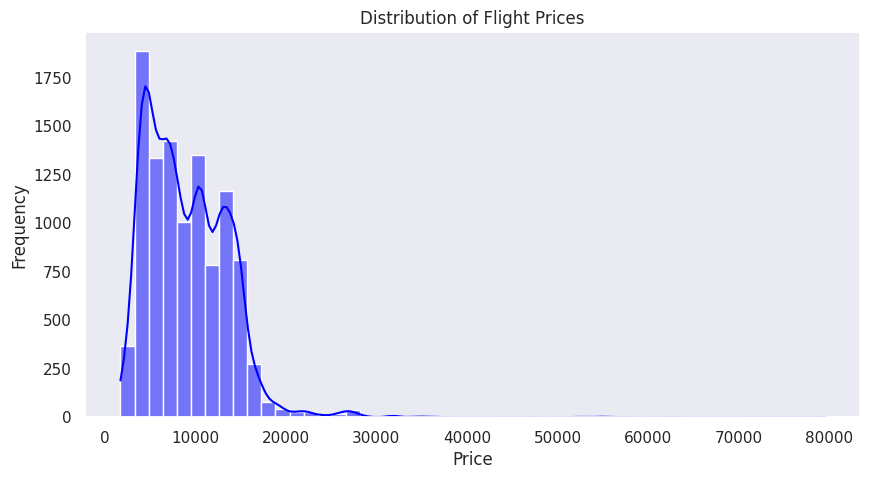

In [ ]:
train_df = preprocess_data(train_df)

# Plot distribution of flight prices
plt.figure(figsize=(10, 5))
sns.histplot(train_df["Price"], bins=50, kde=True, color="blue")
plt.title("Distribution of Flight Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()




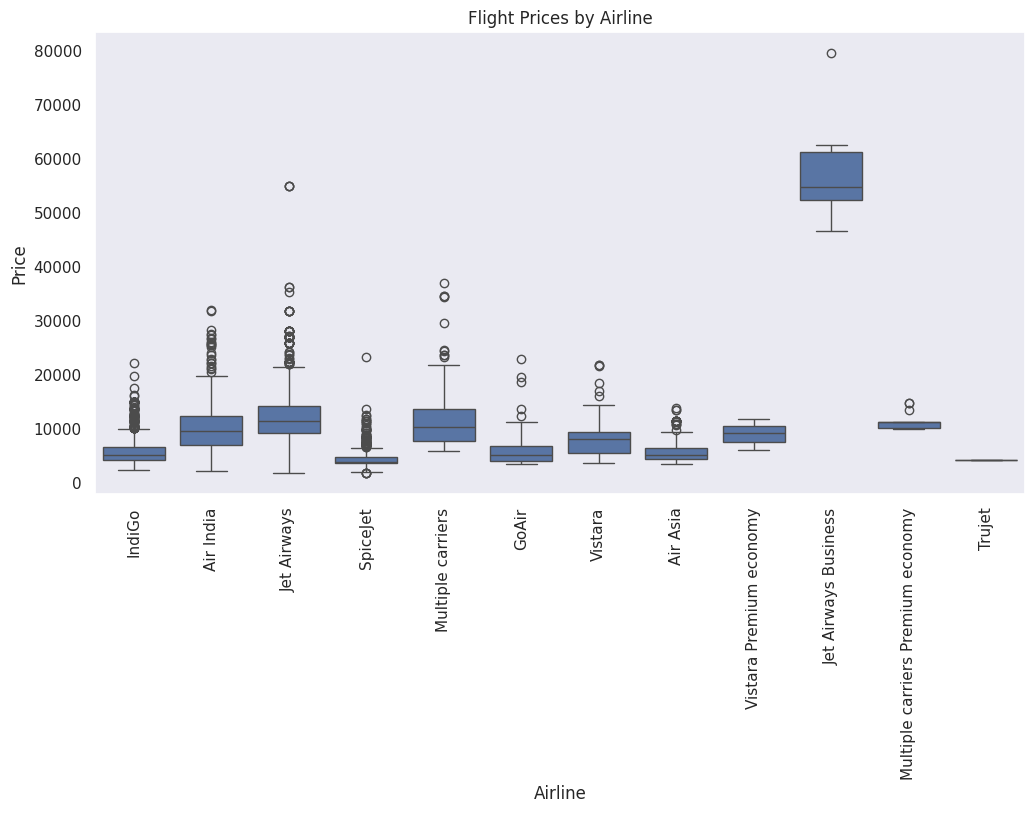

In [ ]:
# Boxplot of Price by Airline
plt.figure(figsize=(12, 6))
sns.boxplot(x="Airline", y="Price", data=train_df)
plt.xticks(rotation=90)
plt.title("Flight Prices by Airline")
plt.show()



<ipython-input-71-5411a9ece5a6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_df["Airline"], order=train_df["Airline"].value_counts().index, palette="viridis")


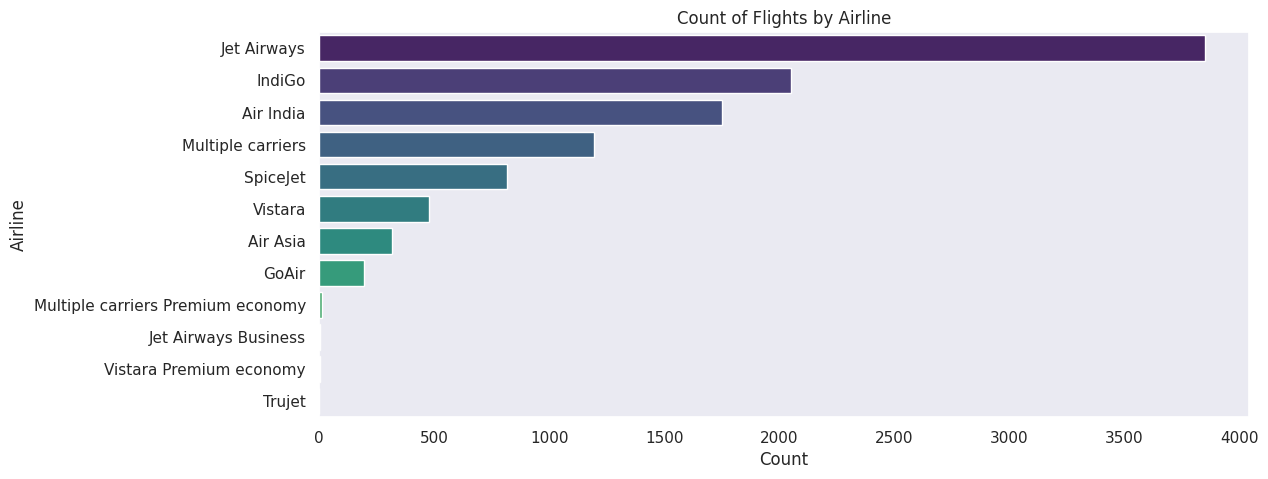

In [ ]:
# Count of Flights by Airline
plt.figure(figsize=(12, 5))
sns.countplot(y=train_df["Airline"], order=train_df["Airline"].value_counts().index, palette="viridis")
plt.title("Count of Flights by Airline")
plt.xlabel("Count")
plt.ylabel("Airline")
plt.show()


<ipython-input-72-f81b843b06da>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_df["Source"], order=train_df["Source"].value_counts().index, palette="coolwarm")


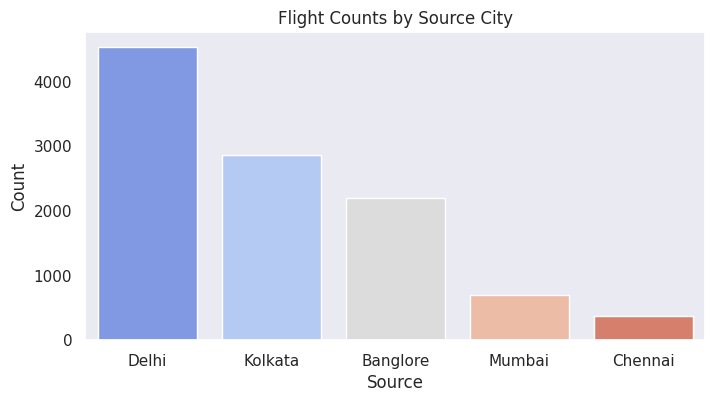

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x=train_df["Source"], order=train_df["Source"].value_counts().index, palette="coolwarm")
plt.title("Flight Counts by Source City")
plt.xlabel("Source")
plt.ylabel("Count")
plt.show()

<ipython-input-73-0700fee94b56>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_df["Destination"], order=train_df["Destination"].value_counts().index, palette="magma")


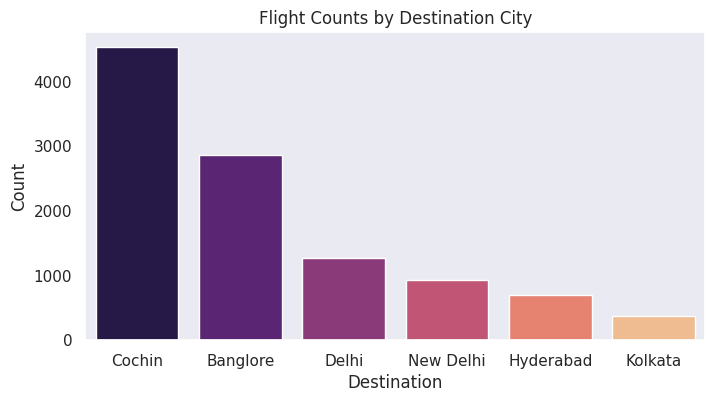

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x=train_df["Destination"], order=train_df["Destination"].value_counts().index, palette="magma")
plt.title("Flight Counts by Destination City")
plt.xlabel("Destination")
plt.ylabel("Count")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

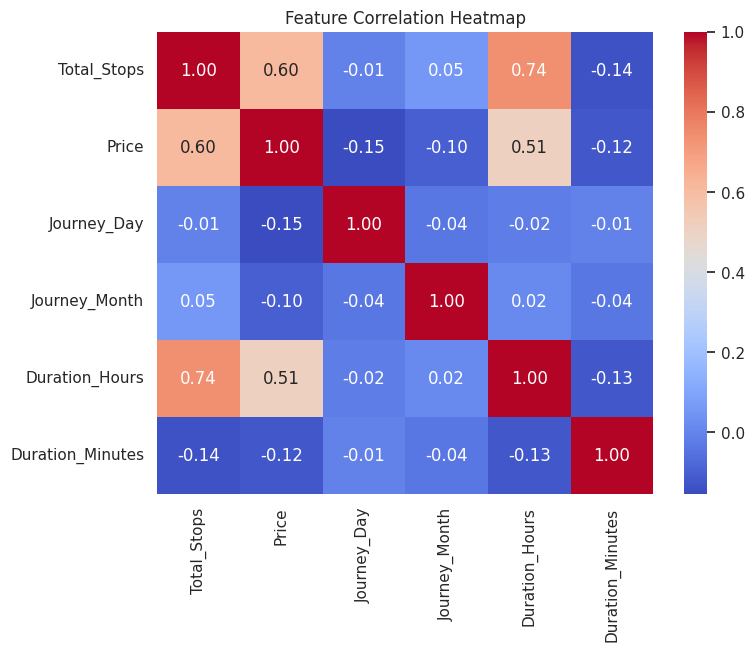

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()